In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import scanpy as sc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from scipy.io import arff
import ntpath
import glob
import os
import math
# !pip install liac-arff
#import arff

from sklearn.model_selection import train_test_split
from random import randrange
from itertools import combinations as comb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import string
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
import sklearn.metrics as mt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
import pickle
# Load object from file
with open(gdrivePath +os.sep + "data" +os.sep+'X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open(gdrivePath +os.sep + "data" +os.sep+'X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open(gdrivePath +os.sep + "data" +os.sep+'y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open(gdrivePath +os.sep + "data" +os.sep+'y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)


In [ ]:
from sklearn.preprocessing import StandardScaler

model = StandardScaler().fit(X_train)
X_train_scaled = model.transform(X_train)
X_test_scaled = model.transform(X_test)

In [ ]:
!pip install kneed


In [ ]:
from sklearn.decomposition import PCA
from kneed import KneeLocator

def knee(X_train,text):
  pca_tester = PCA()
  pca_tester.fit(X_train)


  # Calculate the cumulative explained variance ratio
  cumulative_variance_ratio = np.cumsum(pca_tester.explained_variance_ratio_)

  # Use the KneeLocator to find the "elbow" point
  kneedle = KneeLocator(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, curve='concave', direction='increasing')
  elbow_point = kneedle.knee

  # Plot the explained variance ratio
  plt.figure(figsize=(8, 6))
  plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
  plt.scatter(elbow_point, cumulative_variance_ratio[elbow_point - 1], color='red', label='Elbow Point',s=100)
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Variance Ratio')
  plt.title(text)
  plt.legend()
  plt.grid(True)
  #plt.show()

  print(f"Optimal number of components: {elbow_point}, {cumulative_variance_ratio[elbow_point - 1]}")
  plt.savefig(gdrivePath + os.sep + "figures" + os.sep + "elbow" + os.sep + "new" + os.sep + text+"_pca_.svg", format='svg')

  return elbow_point

In [ ]:
def pca_fun(elbow_point, X_train, X_test):
  pca = PCA(n_components=elbow_point)
  pca.fit(X_train)

  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)

  return X_train_pca, X_test_pca

Optimal number of components: 2556, 0.7593325315035222


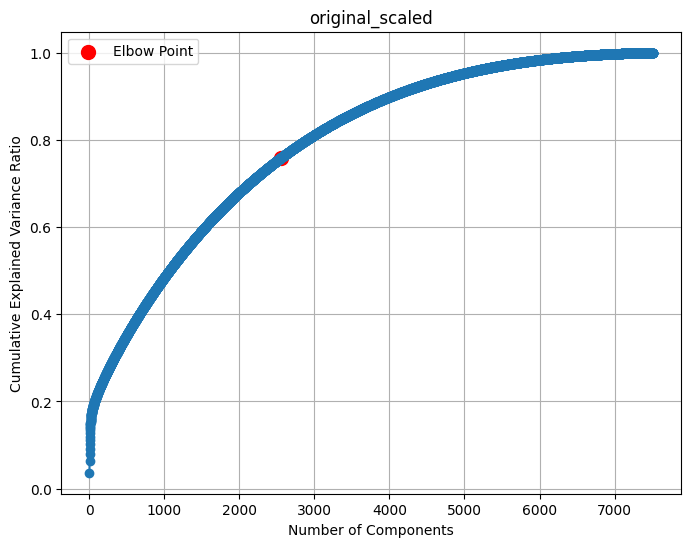

In [ ]:
elbow_point = knee(X_train_scaled,"original_scaled")

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Example dataset (replace with your data)

# Perform PCA
pca = PCA()
pca.fit(X_train_scaled)

# Explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Dimension of interest (e.g., 3rd dimension)
dimension_of_interest = 1500

# Cumulative variance up to the dimension
cumulative_variance = np.sum(explained_variance_ratios[:dimension_of_interest])

# Individual variance ratio for the dimension
individual_variance = explained_variance_ratios[dimension_of_interest - 1]

print(f"Cumulative Variance up to Dimension {dimension_of_interest}: {cumulative_variance:.4f}")
print(f"Variance Ratio for Dimension {dimension_of_interest}: {individual_variance:.4f}")


Cumulative Variance up to Dimension 1500: 0.5917
Variance Ratio for Dimension 1500: 0.0002


In [ ]:
X_train_pca, X_test_pca = pca_fun(2500,X_train_scaled,X_test_scaled) #and 1500

In [ ]:
with open(gdrivePath +os.sep+"results"+os.sep+"PCA"+os.sep+'X_train_pca_2500.pkl', 'wb') as f:
    pickle.dump(X_train_pca, f)
with open(gdrivePath +os.sep+"results"+os.sep+"PCA"+os.sep+'X_test_pca_2500d.pkl', 'wb') as f:
    pickle.dump(X_test_pca, f)